# Three-layer planar waveguide #

This code calculates and plots the normalized propagation constant $b$ in a three-layer planar waveguide as a function of the normalized frequency $V$, also showing the propagating modes.

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

In this waveguide, we have:

$$2V\sqrt{1-b} = m\pi + \arctan{\sqrt{\frac{b+\delta}{1-b}}}+\arctan{\sqrt{\frac{b}{1-b}}}$$

Where: 

$$\delta = \frac{{n_{s}}^{2}-{n_{c}}^{2}}{{n_{f}}^{2} - {n_{s}}^{2}}$$

Is the asymmetry parameter of the waveguide. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nf = 3.5
ns = 1.45
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers
lam0 = 1.55 * micrometers
k0 = 2 * np.pi / lam0

d = (ns**2 - nc**2)/(nf**2 - ns**2)

In [2]:
def Vcm(V):
    arctan = np.arctan(np.sqrt(d))
    V_max = np.max(V)
    m = 0
    Vc = 0
    while True:
        Vc = (m*np.pi + arctan) / 2
        if Vc <= V_max:
            m += 1
        else:
            break
    return m # Return the maximum index of the propagating modes

def V(b):
    arctan1 = np.arctan(np.sqrt((b+d)/(1-b)))
    arctan2 = np.arctan(np.sqrt(b/(1-b)))
    return (arctan1 + arctan2) / (2 * np.sqrt(1-b)) # Return the normalized frequency

## Ploting the graph ##

To plot the graph, we will begin by determining the normalized frequency as a function of the first-mode normalized propagation constant $b_{0}$. After that, the other normalized propagation constants are obtained doing: 

$$b_{m} = b_{0}\left(V+\frac{m\pi}{2}\right)$$

Where $m$ is the index of the plotted mode.

Visualizing the first 4 modes.
Asymmetry parameter: δ = 0.10865.


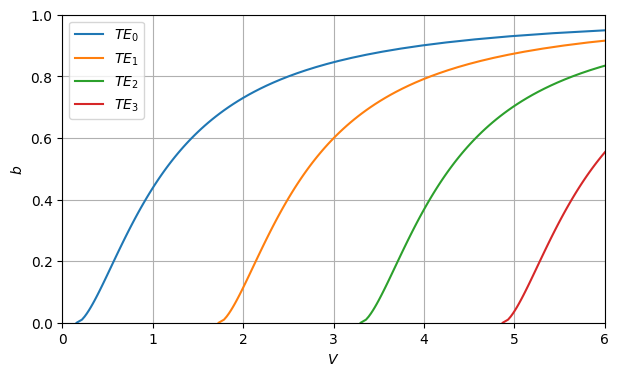

In [ ]:
b = np.linspace(0,0.99,100) # When b -> 1, V -> infinity.

v = V(b)
M = Vcm(v) + 1
v_max = 6 # Maximum value of the normalized frequency that we want to visualize

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    add = m * np.pi / 2
    if add > v_max:
        print(f'Visualizing the first {m} modes.') # If you want to see all modes, this part needs a little change
        break
    plt.plot(v + add, b, label = f'$TE_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$b$')
plt.xlim(0,v_max)
plt.ylim(0,1)
plt.grid(True)
plt.legend(loc = 'best')
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()

The normalized propagation constant and the normalized frequency of the waveguide are related to the propagation constant $\beta$ and the frequency $f$ through the following expressions:

$$b = \frac{\beta^{2}-{k_{0}}^{2}{n_{s}}^{2}}{{k_{0}}^{2}{n_{f}}^{2}-{k_{0}}^{2}{n_{s}}^{2}} = \frac{{n_{eff}}^{2} - {n_{s}}^{2}}{{n_{f}}^{2} - {n_{s}}^{2}}$$

<br>

$$V = \frac{2\pi f}{c}a\sqrt{{n_{f}}^{2} - {n_{s}}^{2}} = k_{0}a\sqrt{{n_{f}}^{2} - {n_{s}}^{2}}$$

With the first equation, we can plot the effective index $n_{eff}$ as a function of the normalized frequency $V$. 

Visualizing the first 4 modes.
Asymmetry parameter: δ = 0.10865.


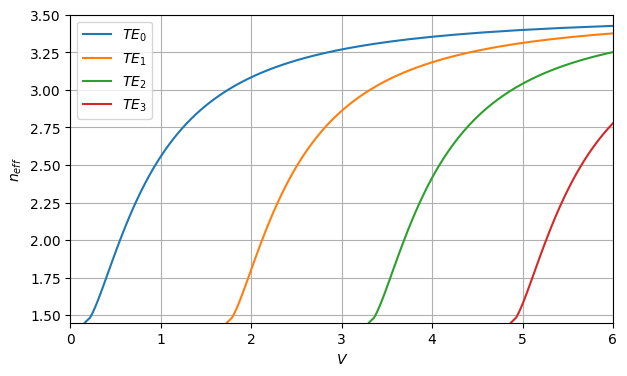

In [6]:
neff = np.sqrt(b*(nf**2 - ns**2) + ns**2)

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    add = m * np.pi / 2
    if add > v_max:
        print(f'Visualizing the first {m} modes.') # If you want to see all modes, this part needs a little change
        break
    plt.plot(v + add, neff, label = f'$TE_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$n_{eff}$')
plt.xlim(0,v_max)
plt.ylim(np.min(neff),3.5)
plt.grid(True)
plt.legend(loc = 'best')
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()

Lastly, we can plot the propagation constant $\beta$ as a function of the normalized frequency, using que relation:

$$\beta = k_{0} n_{eff}$$

Visualizing the first 4 modes.
Asymmetry parameter: δ = 0.10865.


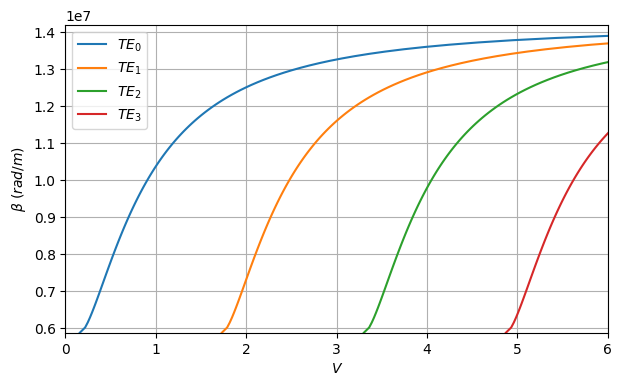

In [14]:
beta = k0 * neff

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    add = m * np.pi / 2
    if add > v_max:
        print(f'Visualizing the first {m} modes.') # If you want to see all modes, this part needs a little change
        break
    plt.plot(v + add, beta, label = f'$TE_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$\beta$ $(rad/m)$')
plt.xlim(0,v_max)
plt.ylim(np.min(beta),k0 * 3.5)
plt.grid(True)
plt.legend(loc = 'best')
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()